<!--Title-->
# Movie Industry Analysis

<!--Problem description-->
## Introduction of the problem
<!-- TO DO: refine paragraph, add stuff-->
<!-- [Decisions to be impacted], [Business value], [Why do you care about this project?]-->
We all know that movie industry is risky, but it can also bring enormous profit at the same time. That's why countless companies and people have been attracted to this industry. However, how risky is it? We all know super hits like Titanic, and we all have seen big productions fail. There hasn't been an universal formula to make a popular movie, but we are still interested in how to choose the right movie to invest in.  

In this analysis, we aim to produce a study to figure out specific reasons that lead to the success of a movie economically, and give advices for companies or individuals who want to enter this industry. In other words, we decided to explore how to select a movie that will be successful economically to invest in for companies and individuls who want to make a profit in this field.

<!--Introduction of the dataset-->
## Introduction of the dataset
<!-- TO DO: more description of data -->
For this analysis, we will be mainly using "The Movies Dataset" on Kaggle (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv). These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.  

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.  

However, due to the fact of large amount of missing entires for budget and revenue, we will be using only the observations where both of these values exists. 

### Overview on the dataset

In [1]:
#Preparations
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.precision', 2)

#import the dataset
df = pd.read_csv('datasets/movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [2]:
#some more information
print('Rows: ' + str(df.shape[0]))
print('Colums: ' + str(df.shape[1]))
print('---------Info of dataset--------------')
print(df.info())
print('---------Number of missing values----------')
print(df.isnull().sum())

Rows: 45466
Colums: 24
---------Info of dataset--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  objec

In the dataset, some rows has problemetic inputs in the column budget, causing the column to be an object rather than float. Remove the rows with problems and change budget into numeric. 

In [3]:
#remove some rows containing data that has problem
df = df.loc[(df['budget'].str.isnumeric())]
df['budget'] = pd.to_numeric(df['budget'])

### Data Processing
<!-- TO DO: Discuss why subsetting instead of imputing, discuss why this should make sense-->
On a first look, this dataset looks pretty normal. However, while looking closer to the variables budget and revenue, it can be seen that there are a lot of zeros in budget and revenue. We believe these zeros represent missing values. Due to the large amount of zeros and the aboundance of data with both data available, we decided to run our study on a subset on the original dataset, where both budget and revenue are available. 

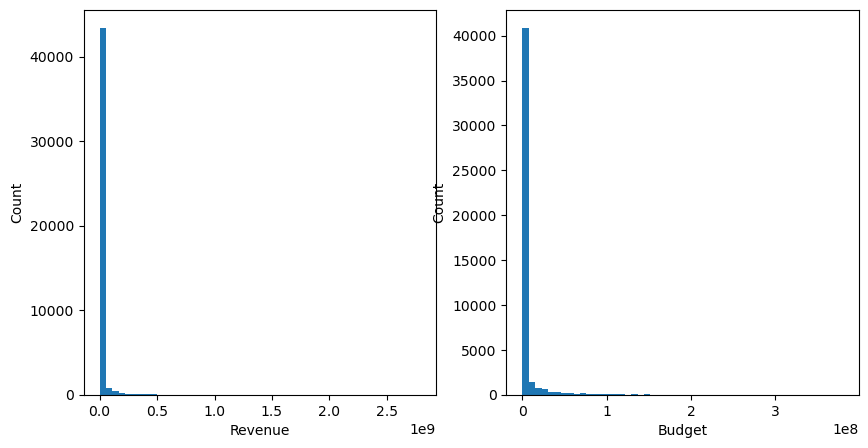

In [4]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
#plot revenue
axis[0].hist(df['revenue'], bins = 50)
axis[0].set_xlabel("Revenue")
axis[0].set_ylabel("Count")

axis[1].hist(df['budget'], bins = 50)
axis[1].set_xlabel("Budget")
axis[1].set_ylabel("Count")
plt.show()

In [5]:
df['revenue'].describe()

count          45,460.00
mean       11,209,348.54
std        64,332,246.74
min                 0.00
25%                 0.00
50%                 0.00
75%                 0.00
max     2,787,965,087.00
Name: revenue, dtype: float64

In [6]:
df['budget'].describe()

count        45,463.00
mean      4,224,578.81
std      17,424,132.63
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     380,000,000.00
Name: budget, dtype: float64

In [7]:
#Subsetting dataset
df_sub = df.loc[(df['revenue'] != 0) & (df['budget'] != 0)].copy()

Look into revenue and budget again. When sorting according to revenue and budget, we see there are a lot of small numbers that do not make sense. Upon looking through resourses, I figured that small numbers here such as 1 or 2 might be in units of million dollars, rather than dollars. 

For the time being, remove these entries due to time constraints (that I cannot check them one by one). I will figure out how to deal with them better. Upon searching from sources, I've decided to set the bar at 1 million dollars for the following reason: a movie below 5 million dollars is categorized as low-budget already, so 1 million could be a reasonable lower limit for people to invest in this industry, so it should suffice our analysis for now. 

In [8]:
df_sub[['budget', 'revenue', 'title']].sort_values(by = ['revenue']).head(10)

,budget,revenue,title
180,2,1.00,Mute Witness
35086,1,1.00,The Letters
7202,12,1.00,The Wind in the Willows
16780,592,1.00,The Merry Widow
15873,1,2.00,Tere Naam
13480,200000,3.00,Dr. Horrible's Sing-Along Blog
38526,1,3.00,Saamy
45399,750000,3.00,All at Once
34275,390000,3.00,Duniyadari
43649,3,3.00,Desmundo


In [9]:
df_sub = df_sub.loc[df_sub['revenue'] > 100000]
df_sub = df_sub.loc[df_sub['budget'] > 100000]
df_sub[['budget', 'revenue']].describe()

,budget,revenue
count,"5,121.00","5,121.00"
mean,"32,506,578.16","94,733,439.32"
std,"40,641,378.26","169,052,748.44"
min,"103,000.00","100,655.00"
25%,"6,000,000.00","9,138,338.00"
50%,"18,000,000.00","33,526,835.00"
75%,"40,000,000.00","104,345,682.00"
max,"380,000,000.00","2,787,965,087.00"


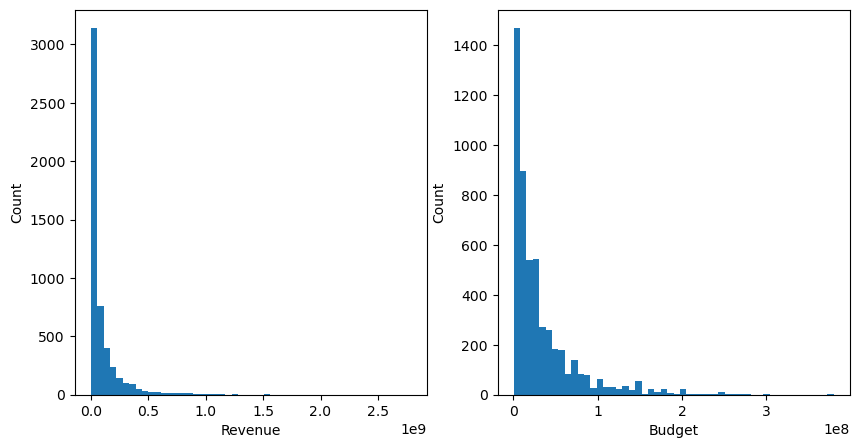

In [10]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
#plot revenue
axis[0].hist(df_sub['revenue'], bins = 50)
axis[0].set_xlabel("Revenue")
axis[0].set_ylabel("Count")

axis[1].hist(df_sub['budget'], bins = 50)
axis[1].set_xlabel("Budget")
axis[1].set_ylabel("Count")
plt.show()

#### Feature selection and Engineering
First, look at the information of our subsetted dataset.

Then, look into the features one by one and dump the ones that don't provide much information. First remove the ones that don't include real informations.

In [11]:
#some more information
print('Rows: ' + str(df_sub.shape[0]))
print('Colums: ' + str(df_sub.shape[1]))
print(df_sub.info())

Rows: 5121
Colums: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5121 entries, 0 to 45422
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5121 non-null   object 
 1   belongs_to_collection  1201 non-null   object 
 2   budget                 5121 non-null   int64  
 3   genres                 5121 non-null   object 
 4   homepage               1830 non-null   object 
 5   id                     5121 non-null   object 
 6   imdb_id                5121 non-null   object 
 7   original_language      5121 non-null   object 
 8   original_title         5121 non-null   object 
 9   overview               5112 non-null   object 
 10  popularity             5121 non-null   object 
 11  poster_path            5121 non-null   object 
 12  production_companies   5121 non-null   object 
 13  production_countries   5121 non-null   object 
 14  release_date           5121 non-n

In [12]:
df_sub = df_sub.drop(['homepage', 'id', 'imdb_id'], axis = 1)

**Adult**

Adult is a feature that examines if a movie has content rating as adult only. As shown below, all the movie we have in our subsetted dataset are not adult only. To avoid the possibility that our subsetted data are biased, we can see there are only 9 movies classified as adult in the original dataset, so we will not using this feature in our analysis.

In [13]:
df_sub['adult'].value_counts()

False    5121
Name: adult, dtype: int64

In [14]:
df['adult'].value_counts()

False    45454
True         9
Name: adult, dtype: int64

In [15]:
df_sub = df_sub.drop(['adult'], axis = 1)

**Video and Status**

Similar to Adult variable, video don't have much information.

In [16]:
df_sub['video'].value_counts()

False    5121
Name: video, dtype: int64

In [17]:
df['video'].value_counts()

False    45367
True        93
Name: video, dtype: int64

In [18]:
df_sub['status'].value_counts()

Released           5117
Rumored               2
Post Production       2
Name: status, dtype: int64

In [19]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [20]:
df_sub = df_sub.drop(['status', 'video', 'poster_path'], axis = 1)

**Original Title**

Original_title is a column that exist since some movie weren't initially in english. The following shows where the title differences from the original title. However, this information can also be extracted from original_language, so this will be removed in our analysis.

In [21]:
df_sub[df_sub['original_title'] != df_sub['title']][['title', 'original_title']]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
110,Rumble in the Bronx,紅番區
210,Burnt by the Sun,Утомлённые солнцем
261,Like Water for Chocolate,Como agua para chocolate
269,Mary Shelley's Frankenstein,Frankenstein
...,...,...
44856,On the Hook!,Na Kryuchke!
45250,Sivaji: The Boss,சிவாஜி
45409,Savages,Dikari
45412,Pro Lyuboff,Про любоff


In [22]:
df_sub = df_sub.drop(['original_title'], axis = 1)

**ROI**

For the sake of analysis, we decided to use Return on Investment (ROI) to measure the economic return of a movie. ROI is calculated by the dividing the total earnings by the cost, and times 100 percent. This should also help to encounter the effect of inflation or other effects that change the value of money. Thus, a new column is made named ROI, which we will be using as our response variable.

In [23]:
df_sub['ROI'] = (df_sub['revenue']-df_sub['budget'])/df_sub['budget']*100

**Year of Production**

Specific date don't provide much information, since trend in movies won't change that fast. For this, I have decided to change it into only years to use for the analysis.

In [24]:
df_sub['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

## Outliers
<!-- TO DO -->
<!-- Define outlier, find outlier, discuss outlier -->
First, I used Isolation Forest to find outliers based on my numerical entires. Here, we basically only have budget, revenue, and ROI as our variables. Since ROI is calculated by combining budget and revenue, outliers are defined only on budget and revenue here.

In [25]:
X = df_sub[['budget', 'revenue']].copy()
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X.values)
pred = clf.predict(X.values)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    4506
-1     615
Name: anomaly, dtype: int64


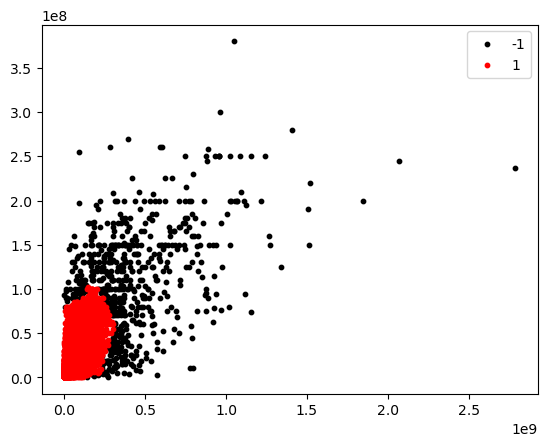

In [26]:
scatter_x = X[['revenue']].values
scatter_y = X[['budget']].values
group = X[['anomaly']].values
cdict = {1:'red', -1:'black'}
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd8025dd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd806ab2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd8025da30>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd806ab880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd806abb50>],
 'means': []}

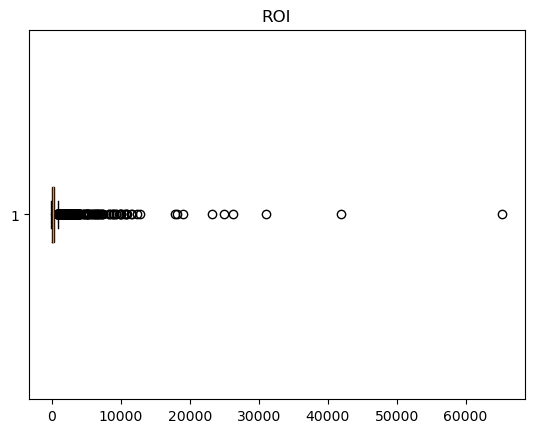

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('ROI')
ax1.boxplot(df_sub['ROI'], vert=False)

In the context of this study, outliers aren't a problem (if they weren't caused by error in the data). Rather, we are interested in how we can predict the super success or failure of films. Thus, outliers will not be removed for this phase.

**Genres**

In the dataset, each movie belongs to a couple of different genres. In our subset, there are together 20 different genres, so make a new column to identify if a movie is in one of the genres.

In [28]:
import ast
df_sub['genres'] = df_sub['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [29]:
backup = df_sub.copy()

In [30]:
s = df_sub.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

C:\Users\kongw\AppData\Local\Temp\ipykernel_15632\456216203.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df_sub.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [31]:
genretag = s.unique()

In [32]:
s.value_counts()

Drama              2431
Comedy             1761
Thriller           1438
Action             1376
Romance             958
Adventure           945
Crime               827
Science Fiction     614
Horror              544
Family              521
Fantasy             494
Mystery             424
Animation           287
History             228
War                 192
Music               185
Western              86
Documentary          47
Foreign              24
TV Movie              1
Name: genre, dtype: int64

In [33]:
# make new columns
for genre in genretag:
    tempname = "is" + genre
    tempname = tempname.replace(" ", "")
    df_sub[tempname]=0

In [34]:
for index, row in df_sub.iterrows():
    for genre in genretag:
        if genre in row['genres']:
            tempname = "is" + genre
            tempname = tempname.replace(" ", "")
            df_sub.at[index, tempname] = 1

In [35]:
df_sub.head(1)

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,ROI,year,isAnimation,isComedy,isFamily,isAdventure,isFantasy,isDrama,isRomance,isAction,isCrime,isThriller,isHistory,isScienceFiction,isMystery,isHorror,isWar,isDocumentary,isWestern,isMusic,isForeign,isTVMovie
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.70,"5,415.00","1,145.18",1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Models

Since our data obviously is not normal, we will have to use non-parametric methods.
#### Random Forest

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df_sub[['budget', 'runtime', 'year', 'isAnimation', 'isComedy', 'isFamily', 
            'isAdventure', 'isFantasy', 'isDrama', 'isRomance', 'isAction', 'isCrime', 'isThriller',
            'isHistory', 'isScienceFiction', 'isMystery', 'isHorror', 'isWar', 'isDocumentary']],
    df_sub['ROI'], test_size = .2, random_state = 10) #split the data

In [37]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=10)

In [38]:
y_pred = regressor.predict(X_test)  # test the output by changing values

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.14252468737859858

In [40]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    regressor, X_test, y_test, n_repeats=10, random_state=10, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index = list(X_train.columns.values))

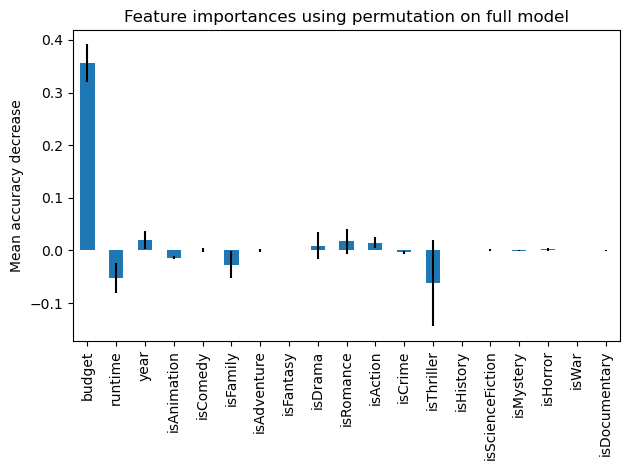

In [41]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### XGBoost


In [ ]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

-0.036161952841863076

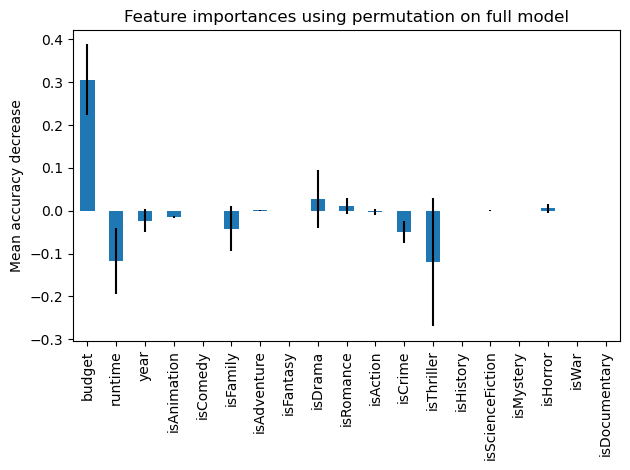

In [50]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=10, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index = list(X_train.columns.values))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Conclusion for now

It seems not possible to predict the ROI of a movie: and this is validated by other papers in the field. It is believe that movie industry follows a distribution with infinite variance, and its success is highly based on pure chance. Thus, it will be much more sensible to explore what effect the chance that a movie will succeed, and this will be the focus of this project later on.

### Further Steps

#### Measure for variables that will predict the possiblity to succeed rather than predict return

First, a measure need to be decided on what is "succeed in the field". And then, it will be possible to model on the possibility of success or do classifications on "if a movie will succeed".

#### Measure each variable's effect on previous point

#### Time series analysis? If time allows
By grouping the movies by year, it may be possible to discover trend using time series analysis techniques.

In [ ]:
a = df_sub.groupby('year')['ROI'].max()
b = df_sub.groupby('year')['ROI'].mean()

In [ ]:
plt.plot(a.index, a)
plt.xticks(np.arange(0, 110, 10))
plt.xlabel('max ROI')
plt.show()

In [ ]:
plt.plot(b.index, b)
plt.xticks(np.arange(0, 110, 10))
plt.xlabel('mean ROI')
plt.show()

## Bibliography

Banik, Rounak. “The Movies Dataset.” Kaggle, ROUNAK BANIK, 10 Nov. 2017, https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv. 

De Vany, Arthur, and W. David Walls. “Uncertainty in the Movie Industry: Does Star Power Reduce the Terror of the Box Office?” Journal of Cultural Economics, vol. 23, no. 4, Nov. 1999, pp. 285–318., https://doi.org/10.1023/a:1007608125988. 

De Vany, Arthur, and W. David Walls. “Bose-Einstein Dynamics and Adaptive Contracting in the Motion Picture Industry.” The Economic Journal, vol. 106, no. 439, 1996, pp. 1493–514. JSTOR, https://doi.org/10.2307/2235197. Accessed 6 Mar. 2023.